<a href="https://colab.research.google.com/github/Dennieeeee/Viacom-Custom-Audience-Ads-Analysis/blob/main/Data_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('custom_audience_ads.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.shape

(885931, 21)

In [ ]:
df.head(3)

,account_id,approximate_count,custom_audience_id,name,retention_days,time_created,customer_file_source,description,is_value_based,data_source_type,...,data_source_creation_params,ad_id,clicks,cpc,impressions,cpm,ctr,comments,video_views,post_reactions
0,104657973074389,1000,6084391234802,Thermador: Retargeting Users who watched Amand...,365,2017-12-08 19:29:08,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,"{""prefill"":""true""}",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104657973074389,1000,6083309678802,Remarketing Macys Spring Fashion,365,2017-11-18 20:36:49,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,"{""prefill"":""true""}",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104657973074389,15000,6083223001402,People who watched at least 3 second of Panten...,365,2017-11-17 17:01:42,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,"{""prefill"":""true""}",23842681867540388,2.0,0.145,104.0,2.788462,0.0192,0.0,23.0,0.0


In [ ]:
df2=pd.read_csv('lookalike_data.csv')

In [ ]:
df2.shape

(1078, 5)

In [ ]:
df2.head(3)

,country,ratio,origin_id,origin_name,origin_type
0,US,0.08,6071223636402,Everyone Who Engaged With MTV Page,custom_audience
1,US,0.08,6071223547802,Everyone Who Engaged With Teyana Taylor Page,custom_audience
2,US,0.08,6071223510402,Everyone who engaged with Diamond White Page,custom_audience


# Data Preparation

## Part I: custom audience ads

In [ ]:
df.isnull().sum()

account_id                          0
approximate_count                   0
custom_audience_id                  0
name                                0
retention_days                      0
time_created                        0
customer_file_source                0
description                    865134
is_value_based                      0
data_source_type                    0
data_source_sub_type                0
data_source_creation_params         0
ad_id                               0
clicks                         107451
cpc                            172522
impressions                    107451
cpm                            107463
ctr                            107463
comments                       112061
video_views                    112061
post_reactions                 112061
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885931 entries, 0 to 885930
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   account_id                   885931 non-null  int64  
 1   approximate_count            885931 non-null  int64  
 2   custom_audience_id           885931 non-null  int64  
 3   name                         885931 non-null  object 
 4   retention_days               885931 non-null  int64  
 5   time_created                 885931 non-null  object 
 6   customer_file_source         885931 non-null  object 
 7   description                  20797 non-null   object 
 8   is_value_based               885931 non-null  bool   
 9   data_source_type             885931 non-null  object 
 10  data_source_sub_type         885931 non-null  object 
 11  data_source_creation_params  885931 non-null  object 
 12  ad_id                        885931 non-null  int64  
 13 

In [ ]:
df['time_created']=pd.to_datetime(df['time_created'])

In [ ]:
print('Entrees duplicates: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Entrees duplicates: 0


In [ ]:
df.dropna(subset=['cpc'],inplace=True)

In [ ]:
df[df['comments'].isnull()].head()

,account_id,approximate_count,custom_audience_id,name,retention_days,time_created,customer_file_source,description,is_value_based,data_source_type,...,data_source_creation_params,ad_id,clicks,cpc,impressions,cpm,ctr,comments,video_views,post_reactions
303,104657973074389,1000,6070841938002,Viacom MTV #HereToListen : People who have wat...,365,2017-05-03 14:17:41,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,"{""prefill"":""true""}",23842658769320407,1035.0,2.415459,512500.0,4.878049,0.0020,NaN,NaN,NaN
32469,10153363056646318,3100,6036110083646,video viewers,30,2016-03-08 22:28:51,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,"{""prefill"":""true""}",6036179896246,7306.0,0.301489,536282.0,4.107317,0.0136,NaN,NaN,NaN
647603,985438574834214,1000,6086471864214,Everyone who engaged with BET Facebook Page,365,2018-03-26 20:17:38,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,"{""prefill"":""true""}",23842887693810392,90.0,4.633444,192546.0,2.165768,0.0005,NaN,NaN,NaN
647604,985438574834214,1000,6086471864214,Everyone who engaged with BET Facebook Page,365,2018-03-26 20:17:38,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,"{""prefill"":""true""}",23842884700310392,976.0,0.188801,132678.0,1.388851,0.0074,NaN,NaN,NaN
647605,985438574834214,1000,6086471864214,Everyone who engaged with BET Facebook Page,365,2018-03-26 20:17:38,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,"{""prefill"":""true""}",23842884690730392,2093.0,0.036240,25025.0,3.030969,0.0836,NaN,NaN,NaN


In [ ]:
df['year'] = df['time_created'].dt.year
df['month'] = df['time_created'].dt.month
df['weekday'] = df['time_created'].dt.day_name()

In [ ]:
df.head(1)

,account_id,approximate_count,custom_audience_id,name,retention_days,time_created,customer_file_source,description,is_value_based,data_source_type,...,cpc,impressions,cpm,ctr,comments,video_views,post_reactions,year,month,weekday
2,104657973074389,15000,6083223001402,People who watched at least 3 second of Panten...,365,2017-11-17 17:01:42,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,0.145,104.0,2.788462,0.0192,0.0,23.0,0.0,2017,11,Friday


In [ ]:
df.isnull().sum()

account_id                          0
approximate_count                   0
custom_audience_id                  0
name                                0
retention_days                      0
time_created                        0
customer_file_source                0
description                    700874
is_value_based                      0
data_source_type                    0
data_source_sub_type                0
data_source_creation_params         0
ad_id                               0
clicks                              0
cpc                                 0
impressions                         0
cpm                                 0
ctr                                 0
comments                         4031
video_views                      4031
post_reactions                   4031
year                                0
month                               0
weekday                             0
dtype: int64

### Visualize and Remove Outliers

In [ ]:
df.describe()

,account_id,approximate_count,custom_audience_id,retention_days,ad_id,clicks,cpc,impressions,cpm,ctr,comments,video_views,post_reactions,year,month
count,7.134090e+05,7.134090e+05,7.134090e+05,713409.000000,7.134090e+05,713409.000000,713409.000000,7.134090e+05,713409.000000,713409.000000,709378.000000,7.093780e+05,709378.000000,713409.000000,713409.000000
mean,9.570835e+14,1.498587e+06,3.885430e+15,114.615629,4.122573e+15,1550.061698,0.385486,3.808773e+04,2.775445,0.039354,12.593342,1.044550e+04,194.518313,2016.250978,6.023018
std,1.079689e+15,9.558812e+06,8.799141e+15,119.219099,9.010088e+15,5676.899898,2.147910,1.121785e+05,4.646533,0.035685,48.611974,3.298173e+04,1259.287687,1.253136,3.797104
min,1.046580e+14,-1.000000e+00,6.009738e+12,0.000000,6.009741e+12,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2013.000000,1.000000
25%,8.311810e+14,1.000000e+03,6.036235e+12,0.000000,6.046792e+12,21.000000,0.018103,1.268000e+03,0.818414,0.015500,0.000000,1.840000e+02,2.000000,2016.000000,3.000000
50%,8.311810e+14,2.200000e+03,6.041897e+12,180.000000,6.076797e+12,152.000000,0.045758,6.139000e+03,1.483438,0.032100,1.000000,1.345000e+03,17.000000,2016.000000,4.000000
75%,8.311810e+14,1.200000e+05,6.052340e+12,180.000000,6.079050e+12,1004.000000,0.155413,2.973000e+04,2.877714,0.054700,6.000000,7.624000e+03,87.000000,2016.000000,10.000000
max,1.015561e+16,1.820000e+08,2.384532e+16,365.000000,2.384532e+16,482490.000000,259.610000,6.038300e+06,184.639556,2.000000,7995.000000,2.231807e+06,289191.000000,2020.000000,12.000000


In [ ]:
#Trim outliers custom_audience_ads dataset:
starting_percentile = df['ctr'].quantile(.02)
ending_percentile = df['ctr'].quantile(.98)
outliers_df = df.loc[((df['ctr'] <= starting_percentile) | (df['ctr'] >= ending_percentile))]
df_trimmed = df.loc[((df['ctr'] > starting_percentile) & (df['ctr'] < ending_percentile))]

In [ ]:
df.shape

(713409, 24)

In [ ]:
df_trimmed.shape

(683314, 24)

In [ ]:
df2.head()

,country,ratio,origin_id,origin_name,origin_type
0,US,0.08,6071223636402,Everyone Who Engaged With MTV Page,custom_audience
1,US,0.08,6071223547802,Everyone Who Engaged With Teyana Taylor Page,custom_audience
2,US,0.08,6071223510402,Everyone who engaged with Diamond White Page,custom_audience
3,US,0.08,6070776679602,Macys #SpringSummerFashion : People who have w...,custom_audience
4,US,0.08,6070776595802,Macys #SpringSummerFashion : People who watche...,custom_audience


In [ ]:
#Trim outliers lookalike data:
starting_percentile = df2['ratio'].quantile(.02)
ending_percentile = df2['ratio'].quantile(.98)
outliers_df2 = df2.loc[((df2['ratio'] <= starting_percentile) | (df2['ratio'] >= ending_percentile))]
df2_trimmed = df2.loc[((df2['ratio'] > starting_percentile) & (df2['ratio'] < ending_percentile))]

In [ ]:
df2_trimmed.shape

(770, 5)

#### Continuous Variables
Go through each of them one at a time using scatter plot and boxplot, and then remove outliers.

In [ ]:
df_trimmed.describe()

,account_id,approximate_count,custom_audience_id,retention_days,ad_id,clicks,cpc,impressions,cpm,ctr,comments,video_views,post_reactions,year,month
count,6.833140e+05,6.833140e+05,6.833140e+05,683314.000000,6.833140e+05,683314.000000,683314.000000,6.833140e+05,683314.000000,683314.000000,680206.000000,6.802060e+05,680206.000000,683314.000000,683314.000000
mean,9.532028e+14,1.413088e+06,3.674194e+15,113.140021,3.862055e+15,1466.661851,0.252561,3.720267e+04,2.758282,0.037658,12.530686,1.026927e+04,192.433692,2016.222413,6.029958
std,1.056920e+15,9.251797e+06,8.601388e+15,118.012320,8.777732e+15,5165.783360,0.741978,1.101747e+05,4.651336,0.027184,48.997971,3.268856e+04,1271.411422,1.227370,3.803335
min,1.046580e+14,-1.000000e+00,6.009738e+12,0.000000,6.009741e+12,1.000000,0.000000,9.000000e+00,0.000000,0.001400,0.000000,0.000000e+00,0.000000,2013.000000,1.000000
25%,8.311810e+14,1.000000e+03,6.036229e+12,0.000000,6.046774e+12,23.000000,0.018680,1.219000e+03,0.816724,0.016300,0.000000,1.870000e+02,2.000000,2016.000000,3.000000
50%,8.311810e+14,2.100000e+03,6.041883e+12,180.000000,6.076452e+12,157.000000,0.045046,5.993000e+03,1.479751,0.032200,1.000000,1.334000e+03,17.000000,2016.000000,4.000000
75%,8.311810e+14,1.100000e+05,6.051226e+12,180.000000,6.079050e+12,978.000000,0.140488,2.887400e+04,2.849683,0.053600,6.000000,7.488000e+03,86.000000,2016.000000,10.000000
max,1.015561e+16,1.820000e+08,2.384532e+16,365.000000,2.384532e+16,482490.000000,62.923333,6.038300e+06,184.639556,0.117400,7995.000000,2.231807e+06,289191.000000,2020.000000,12.000000


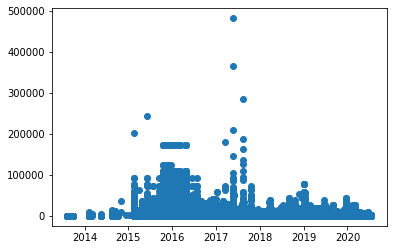

In [ ]:
#visualize clicks
plt.scatter('time_created','clicks',data=df_trimmed)

In [ ]:
df_trimmed[df_trimmed['clicks']>300000]

,account_id,approximate_count,custom_audience_id,name,retention_days,time_created,customer_file_source,description,is_value_based,data_source_type,...,cpc,impressions,cpm,ctr,comments,video_views,post_reactions,year,month,weekday
33782,831180993630429,22000000,6078723567972,"Lookalike (US, 10%) - People who like Awesomen...",0,2017-05-18 16:50:23,NOT_APPLICABLE,NaN,False,SEED_BASED,...,0.010339,3488058.0,1.087430,0.1052,185.0,1550137.0,5817.0,2017,5,Thursday
33823,831180993630429,22000000,6078723567972,"Lookalike (US, 10%) - People who like Awesomen...",0,2017-05-18 16:50:23,NOT_APPLICABLE,NaN,False,SEED_BASED,...,0.015060,5651918.0,1.285594,0.0854,580.0,1906437.0,25976.0,2017,5,Thursday


Outliers found on line 33782 and 33823. We want to remove them.

In [ ]:
#drop rows 33782 and 33823
df_trimmed=df_trimmed.drop([33782,33823])

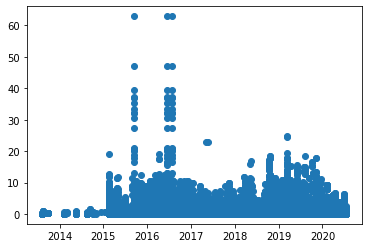

In [ ]:
#cpc
plt.scatter('time_created','cpc',data=df_trimmed)

In [ ]:
df_trimmed[df_trimmed['cpc']>60]

,account_id,approximate_count,custom_audience_id,name,retention_days,time_created,customer_file_source,description,is_value_based,data_source_type,...,cpc,impressions,cpm,ctr,comments,video_views,post_reactions,year,month,weekday
657104,342224185984168,210000,6058593221986,Comedy Central The Daily Show with Trevor Noah...,180,2016-07-26 16:36:41,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,62.923333,4269.0,88.437573,0.0014,0.0,1000.0,27.0,2016,7,Tuesday
662050,342224185984168,1500,6055679096786,Comedy Central The Daily Show with Jon Stewart...,180,2016-06-13 21:00:31,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,62.923333,4269.0,88.437573,0.0014,0.0,1000.0,27.0,2016,6,Monday
678048,342224185984168,53000,6039228967986,Comedy Central The Daily Show with Trevor Noah...,180,2015-09-09 14:56:03,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,62.923333,4269.0,88.437573,0.0014,0.0,1000.0,27.0,2015,9,Wednesday


In [ ]:
df_trimmed=df_trimmed.drop([657104,662050,678048])

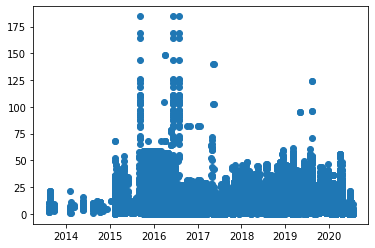

In [ ]:
#cpm
plt.scatter('time_created','cpm',data=df_trimmed)

In [ ]:
df_trimmed=df_trimmed.drop(df_trimmed[df_trimmed['cpm']>150].index)

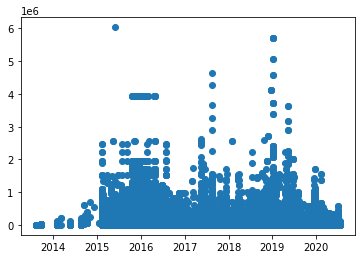

In [ ]:
#impressions
plt.scatter('time_created','impressions',data=df_trimmed)

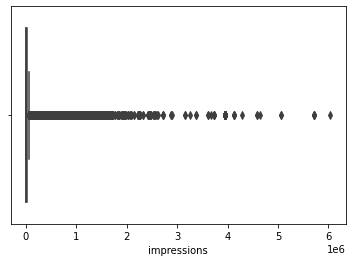

In [ ]:
sns.boxplot(df_trimmed['impressions'])

In [ ]:
df_trimmed=df_trimmed.drop(df_trimmed[df_trimmed['impressions']>4000000].index)

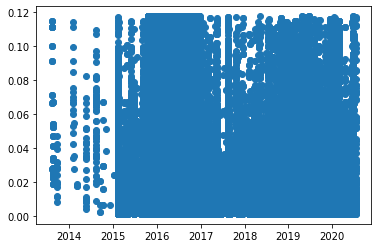

In [ ]:
#ctr
plt.scatter('time_created','ctr',data=df_trimmed)

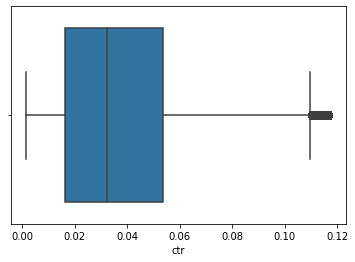

In [ ]:
sns.boxplot(df_trimmed['ctr'])

In [ ]:
df_trimmed=df_trimmed.drop(df_trimmed[df_trimmed['ctr']>1.75].index)

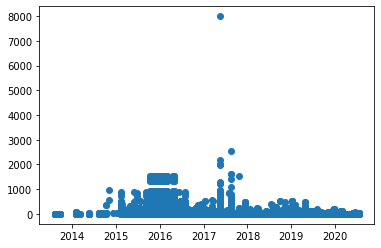

In [ ]:
#comments
plt.scatter('time_created','comments',data=df_trimmed)

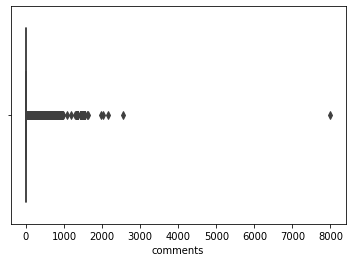

In [ ]:
sns.boxplot(df_trimmed['comments'])

In [ ]:
df_trimmed=df_trimmed.drop(df_trimmed[df_trimmed['comments']>3000].index)

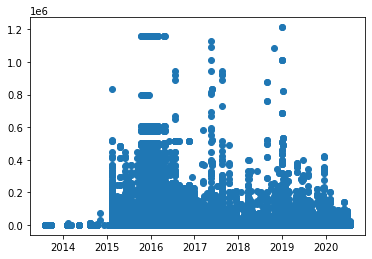

In [ ]:
#video_views
plt.scatter('time_created','video_views',data=df_trimmed)

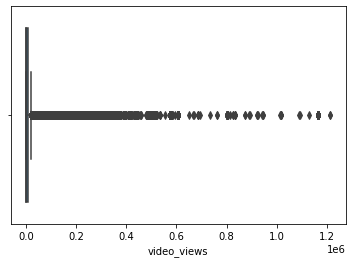

In [ ]:
sns.boxplot(df_trimmed['video_views'])

In [ ]:
df_trimmed=df_trimmed.drop(df_trimmed[df_trimmed['video_views']>1500000].index)

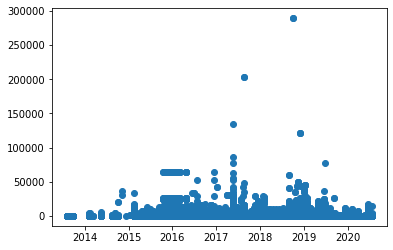

In [ ]:
#post_reactions
plt.scatter('time_created','post_reactions',data=df_trimmed)

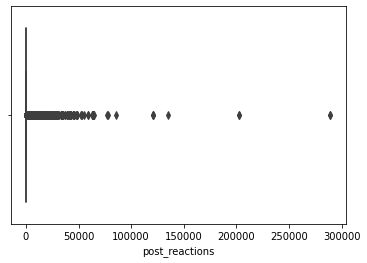

In [ ]:
sns.boxplot(df_trimmed['post_reactions'])

In [ ]:
df_trimmed=df_trimmed.drop(df_trimmed[df_trimmed['post_reactions']>100000].index)

#### Discrete Variables Cleaning

In [ ]:
df_trimmed.head(2)

,account_id,approximate_count,custom_audience_id,name,retention_days,time_created,customer_file_source,description,is_value_based,data_source_type,...,cpc,impressions,cpm,ctr,comments,video_views,post_reactions,year,month,weekday
2,104657973074389,15000,6083223001402,People who watched at least 3 second of Panten...,365,2017-11-17 17:01:42,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,0.145,104.0,2.788462,0.0192,0.0,23.0,0.0,2017,11,Friday
4,104657973074389,15000,6083223001402,People who watched at least 3 second of Panten...,365,2017-11-17 17:01:42,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,0.445,631.0,1.410460,0.0032,1.0,217.0,12.0,2017,11,Friday


In [ ]:
df_trimmed['data_source_type'].value_counts()

EVENT_BASED      633733
SEED_BASED        36244
FILE_IMPORTED     13185
UNKNOWN             114
Name: data_source_type, dtype: int64

In [ ]:
df_trimmed['data_source_sub_type'].value_counts()

ENGAGEMENT_EVENTS                       330266
VIDEO_EVENTS                            268577
PLATFORM_USERS                           22218
WEB_PIXEL_HITS                           19699
IG_BUSINESS_EVENTS                       13386
ENGAGEMENT_EVENT_USERS                   11257
EXTERNAL_IDS                              8854
MULTI_HASHES                              2972
PAGE_FANS                                 1176
MOBILE_APP_EVENTS                         1170
HASHES_OR_USER_IDS                         920
CUSTOM_AUDIENCE_USERS                      725
STORE_VISIT_EVENTS                         629
MULTI_EVENT_SOURCE                         508
MOBILE_ADVERTISER_IDS                      439
MOBILE_APP_CUSTOM_AUDIENCE_USERS           312
ANYTHING                                   114
VIDEO_EVENT_USERS                           33
WEB_PIXEL_HITS_CUSTOM_AUDIENCE_USERS        15
MOBILE_APP_COMBINATION_EVENTS                6
Name: data_source_sub_type, dtype: int64

In [ ]:
df_trimmed['name'].value_counts().head()

Video Engagement - "Pretty sure we'll be making this after school ever..." - 905160109565850 - Completed    3730
Video Engagement - "Easy and healthy breakfasts?! Yas please! That egg..." - 898716883543506 - Completed    3722
Video Engagement - "Healthy junk food?! But how?! We figured it out. Y..." - 901560776592450 - Completed    3689
Video Engagement - "Put your hands together for the wonderful new @[20..." - 899994426749085 - Completed    3633
Video Engagement - "The mid-season finale of #GuidanceShow hits @[9655..." - 902590496489478 - Completed    3543
Name: name, dtype: int64

In [ ]:
df_trimmed.head(1)

,account_id,approximate_count,custom_audience_id,name,retention_days,time_created,customer_file_source,description,is_value_based,data_source_type,...,cpc,impressions,cpm,ctr,comments,video_views,post_reactions,year,month,weekday
2,104657973074389,15000,6083223001402,People who watched at least 3 second of Panten...,365,2017-11-17 17:01:42,NOT_APPLICABLE,NaN,False,EVENT_BASED,...,0.145,104.0,2.788462,0.0192,0.0,23.0,0.0,2017,11,Friday


# EDA

In [ ]:
df = df_trimmed

In [ ]:
#find out which audience has the highest average Ctr?
grouped_audience=df.groupby(by='custom_audience_id',as_index=False)['ctr'].mean()
sorted_grouped_audience=grouped_audience.sort_values(by='ctr',ascending=False)
top10=sorted_grouped_audience.iloc[0:10]
top10



,custom_audience_id,ctr
2912,23843472544700209,0.108000
2445,23843060174840357,0.101000
3113,23844285539840673,0.089580
0,6009738103002,0.086725
2,6009738128002,0.086725
1,6009738121402,0.086725
1144,6048374856202,0.086600
1141,6048374721802,0.086600
1142,6048374727402,0.086600
1138,6048374699402,0.086600


Text(0.5, 1.0, 'Top 10 Audiences')

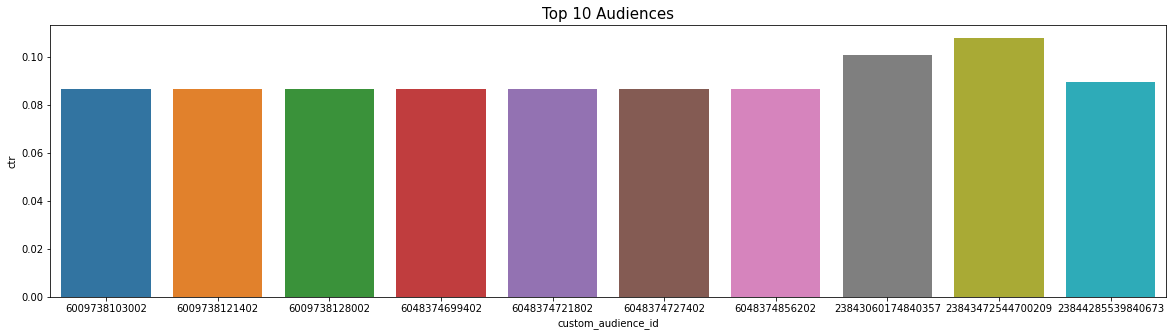

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot('custom_audience_id','ctr',data=top10)
plt.title('Top 10 Audiences',size=15)

Text(0.5, 1.0, 'Number of Clicks Annually')

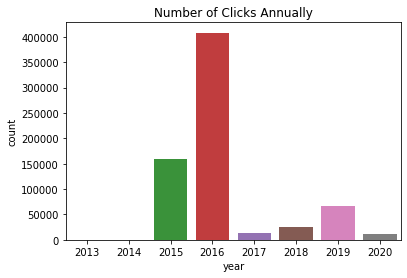

In [ ]:
sns.countplot(df['year'])
plt.title('Number of Clicks Annually')

Text(0.5, 1.0, 'Number of Clicks Monthly')

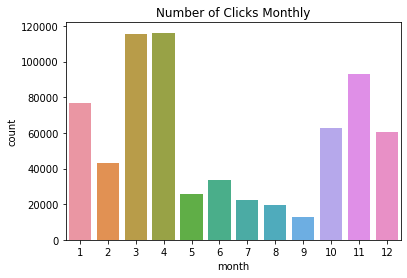

In [ ]:
sns.countplot(df['month'])
plt.title('Number of Clicks Monthly')

Text(0.5, 1.0, 'Number of Clicks Weekly')

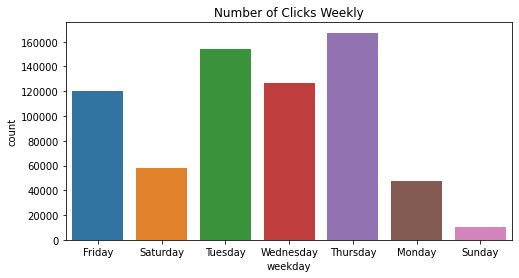

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(df['weekday'])
plt.title('Number of Clicks Weekly')

Text(0, 0.5, 'click through rate')

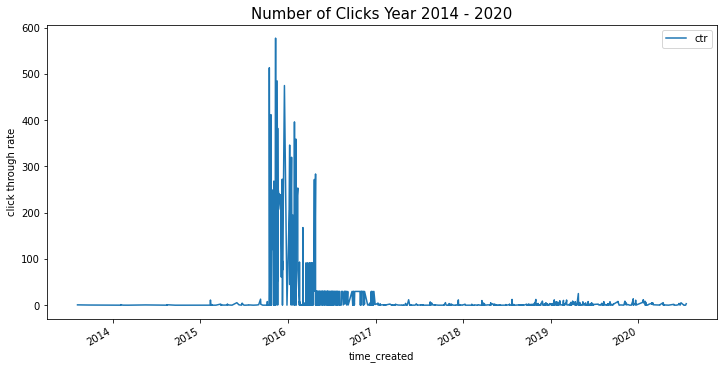

In [ ]:
df.groupby('time_created').agg({'ctr':'sum'}).plot(figsize=(12,6))
plt.title('Number of Clicks Year 2014 - 2020',size=15)
plt.ylabel('click through rate')

Text(0.5, 1.0, 'Number of Clicks Daily in 2016')

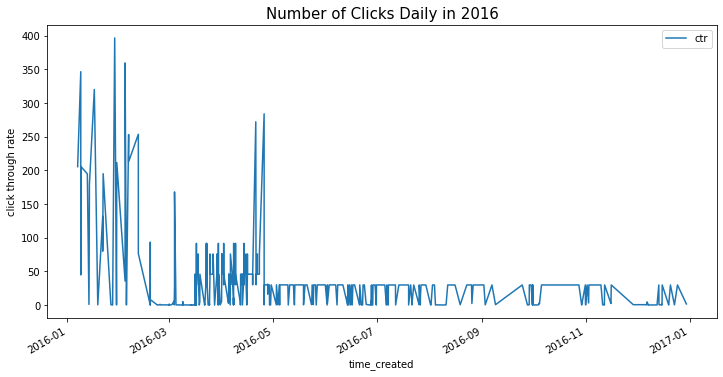

In [ ]:
#2016 only
year16= df[(df['time_created']>='2016-01-01') &
  (df['time_created']<'2017-01-01')]
year16.groupby('time_created').agg({'ctr':'sum'}).plot(figsize=(12,6))
plt.ylabel('click through rate')
plt.title('Number of Clicks Daily in 2016',size=15)

<strong>Which custom audience id has the highest average clicks?</strong>

Text(0.5, 1.0, 'Highest Average Clicks')

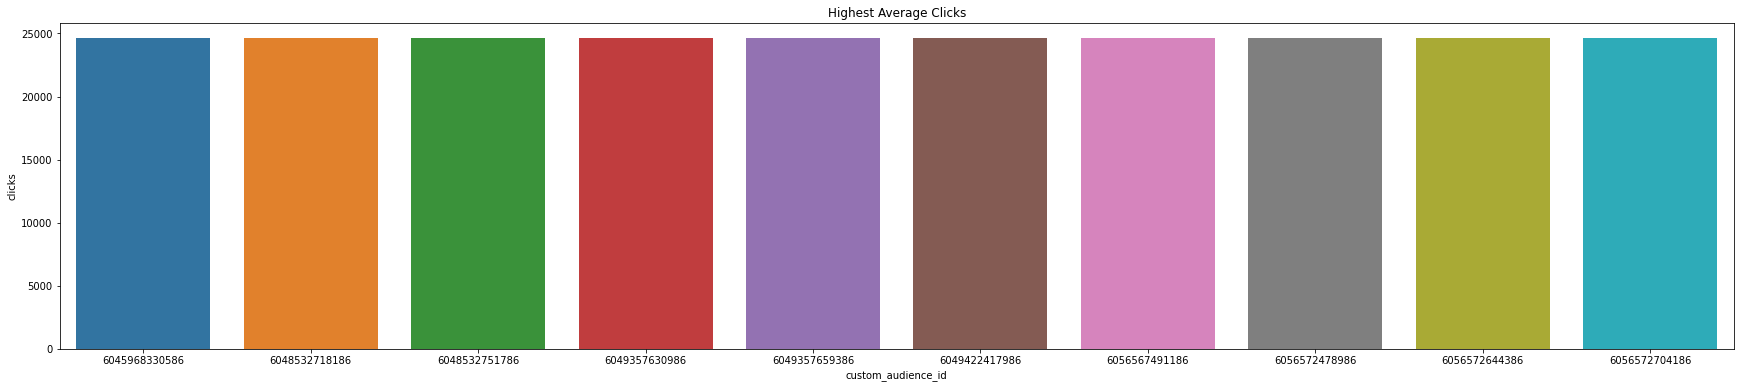

In [ ]:
plt.figure(figsize=(30,6))
grouped = year16.groupby(by=['custom_audience_id'],as_index=False)['clicks'].mean()
sorted_clicks = grouped.sort_values(by='clicks',ascending=False)
top_10 = sorted_clicks.head(10)
sns.barplot('custom_audience_id','clicks',data=top_10)
plt.title('Highest Average Clicks')

In [ ]:
top_10.head(10)

,custom_audience_id,clicks
585,6048532718186,24618.095238
887,6056567491186,24618.095238
634,6049357630986,24618.095238
635,6049357659386,24618.095238
510,6045968330586,24618.095238
890,6056572704186,24618.095238
889,6056572644386,24618.095238
888,6056572478986,24618.095238
586,6048532751786,24618.095238
649,6049422417986,24618.095238


In [ ]:
top_50.tail(10)

,custom_audience_id,clicks
112,6037030090172,8862.166667
51,6036234941372,8862.166667
12,6036111318772,8862.166667
204,6038383812772,8862.166667
145,6037548310972,8578.452431
98,6037030085172,8578.452431
44,6036234938972,8578.452431
140,6037463666172,8578.452431
220,6039770449172,8571.067245
443,6043815725572,7923.074153


<strong>Which custom audience id has the highest average cpm?</strong>

In [ ]:
grouped_cpm = year16.groupby(by='custom_audience_id',as_index=False)['cpm'].mean().sort_values(by='cpm',ascending=False)



In [ ]:
top_10_cpm = grouped_cpm.head(10)

In [ ]:
top_10_cpm.head(10)

,custom_audience_id,cpm
648,6049421959186,35.039824
744,6051227174586,33.505316
625,6049346614386,30.931787
899,6056589313786,24.909177
631,6049353439786,24.909177
626,6049347160586,24.909177
627,6049347761386,24.909177
839,6054383004186,24.301092
838,6054382947786,23.277322
835,6054305486186,23.277322


Text(0.5, 1.0, 'Highest Average Cpm')

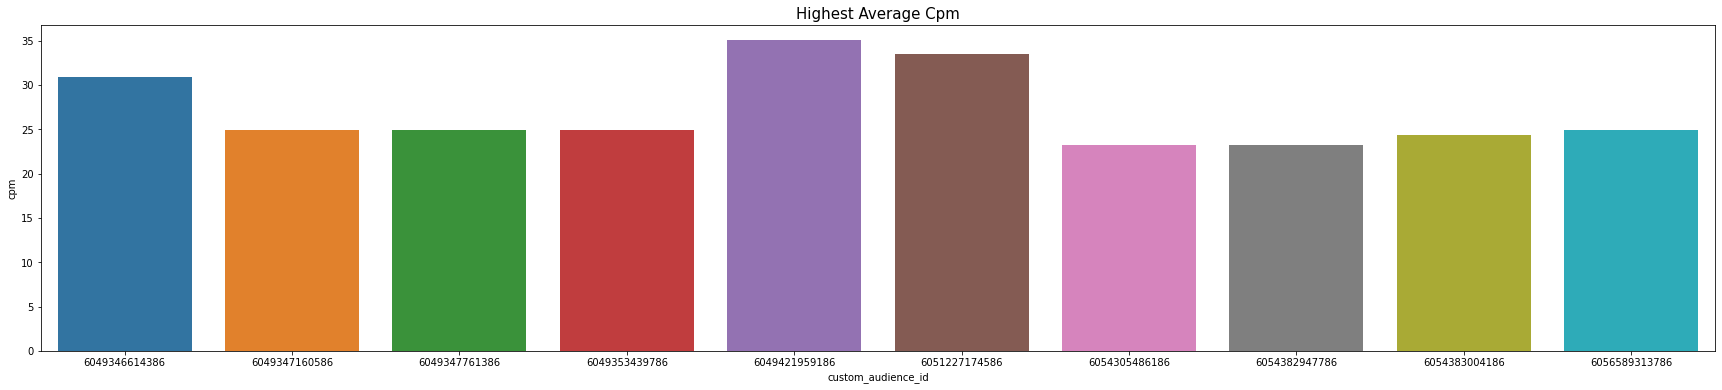

In [ ]:
plt.figure(figsize=(30,6))
sns.barplot('custom_audience_id','cpm',data=top_10_cpm)
plt.title('Highest Average Cpm',size=15)

<strong>Which custom audience id has the highest average impressions?</strong>

In [ ]:
grouped_impressions = year16.groupby(by='custom_audience_id',as_index=False)['impressions'].mean().sort_values(by='impressions',ascending=False)

In [ ]:
top_impressions = grouped_impressions.head(10)

In [ ]:
top_impressions.head(10)

,custom_audience_id,impressions
887,6056567491186,587138.428571
888,6056572478986,587138.428571
556,6048149185386,587138.428571
557,6048149194586,587138.428571
585,6048532718186,587138.428571
586,6048532751786,587138.428571
890,6056572704186,587138.428571
509,6045968318786,587138.428571
649,6049422417986,587138.428571
635,6049357659386,587138.428571


Text(0.5, 1.0, 'Highest Average Impressions')

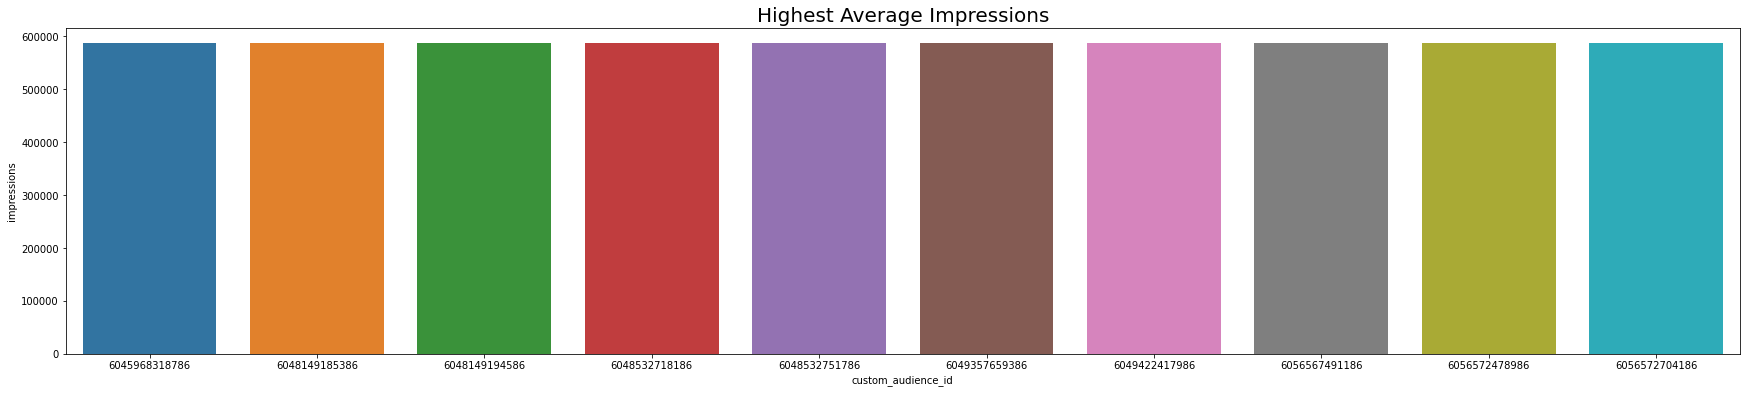

In [ ]:
plt.figure(figsize=(30,6))
sns.barplot('custom_audience_id','impressions',data=top_impressions)
plt.title('Highest Average Impressions',size=20)

In [ ]:
year16['data_source_type'].value_counts()

EVENT_BASED      406432
SEED_BASED         1511
FILE_IMPORTED        47
Name: data_source_type, dtype: int64

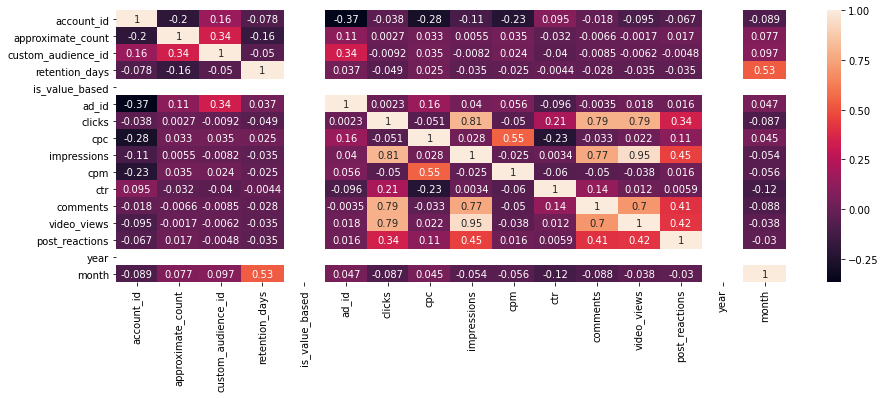

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(year16.corr(),annot=True)